# Numerical Integration

## 1. One-dimentional numerical integration

**(a)** Use the mid-point approximation, the tarpezoidal approiximation and Simpson's rule to estimate the integrals of 

$$f(x) = 2x+3x^2+4x^3$$
and
$$g(x)=e^{-x}$$
for $0\le x\le 1$. What is the approximate $n-$dependence of the error in each case?
Which approximation yields the best results for the same computation time?


In [15]:
import math

f=lambda x: 2*x+3*x**2+4*x**3
g=lambda x: math.exp(-x)


In [16]:
import numpy as np;

def midPoint(func,n,min=0.,max=1.):
    h=(max-min)/n
    return h*np.sum([func(x+0.5*h) for x in np.linspace(min,max,n,endpoint=False)])

def tarpezoidal(func,n,min=0.,max=1.):
    h=(max-min)/n
    return h/2*(func(min)+func(max)+2*np.sum([func(x) for x in np.arange(min+h,max,h)]))

def simpson(func,n,min=0.,max=1.):
    h=(max-min)/n
    return h/3*(func(min)+func(max)+np.sum([4*func(min+h*i) if i%2!=0 else 2*func(min+h*i) for i in np.arange(1,n)]))



The exact value of the results should be $3$ and $1-1/e$

In [17]:
standard=[3,1-1./math.e]
print(standard)

[3, 0.6321205588285577]


In [18]:
nList=[4,10,20,40,100,1000,10000,100000,1000000,10000000]
methodList=[midPoint,tarpezoidal,simpson]


In [19]:
table=np.reshape([method(f,n) for n in nList for method in methodList],(len(nList),len(methodList)))
errorTable=table-standard[0]
print("f(x) results")
print("value:")
print(table)
print("error:")
print(errorTable)

f(x) results
value:
[[2.953125   3.09375    3.        ]
 [2.9925     3.015      3.        ]
 [2.998125   3.00375    3.        ]
 [2.99953125 3.0009375  3.        ]
 [2.999925   3.00015    3.        ]
 [2.99999925 3.0000015  3.        ]
 [2.99999999 3.00000001 3.        ]
 [3.         3.         3.        ]
 [3.         3.         3.        ]
 [3.         3.0000009  3.        ]]
error:
[[-4.68750000e-02  9.37500000e-02  0.00000000e+00]
 [-7.50000000e-03  1.50000000e-02  4.44089210e-16]
 [-1.87500000e-03  3.75000000e-03  8.88178420e-16]
 [-4.68750000e-04  9.37500000e-04  1.33226763e-15]
 [-7.50000000e-05  1.50000000e-04  0.00000000e+00]
 [-7.50000000e-07  1.50000000e-06  0.00000000e+00]
 [-7.49999929e-09  1.49999999e-08  0.00000000e+00]
 [-7.49991180e-11  1.50000901e-10  1.33226763e-15]
 [-7.50510765e-13  1.49880108e-12  4.44089210e-16]
 [-8.43769499e-15  9.00000014e-07 -3.99680289e-15]]


In [20]:
table=np.reshape([method(g,n) for n in nList for method in methodList],(len(nList),len(methodList)))
errorTable=table-standard[1]
print("g(x) results")
print("value:")
print(table)
print("error:")
print(errorTable)

g(x) results
value:
[[0.63047741 0.63540943 0.63213418]
 [0.63185725 0.63264724 0.63212091]
 [0.63205472 0.63225225 0.63212058]
 [0.6321041  0.63215348 0.63212056]
 [0.63211793 0.63212583 0.63212056]
 [0.63212053 0.63212061 0.63212056]
 [0.63212056 0.63212056 0.63212056]
 [0.63212056 0.63212056 0.63212056]
 [0.63212056 0.63212056 0.63212056]
 [0.63212056 0.6321206  0.63212056]]
error:
[[-1.64315144e-03  3.28887020e-03  1.36164920e-05]
 [-2.63306766e-04  5.26679359e-04  3.50760458e-07]
 [-6.58410906e-05  1.31686296e-04  2.19420998e-08]
 [-1.64611728e-05  3.29226028e-05  1.37168710e-09]
 [-2.63382798e-06  5.26766254e-06  3.51173535e-11]
 [-2.63383558e-08  5.26767123e-08  3.55271368e-15]
 [-2.63383426e-10  5.26767296e-10  1.11022302e-16]
 [-2.63378208e-12  5.26778621e-12  1.11022302e-16]
 [-2.64233080e-14  5.27355937e-14  2.22044605e-16]
 [ 7.77156117e-16  3.67879457e-08 -2.22044605e-16]]


As we can see, the 3 columns represent midpoint, tarpezoidal, and simpson method respectively. Apparently, viewed in the rows, as n goes larger, the error in every method tends to decrease.


As we look into columns, there is a distinct difference in the precision of the results. In general, regardless of the value of n, simpson's method is always better than tarpezoidal method and the midpoint method. The precision of tarpezoidal and midPoint methods are approximately of the same magnitude, and midPoint method's error is about half of that of the simpson method.

In conclusion, the Simpon's method yields the best result.

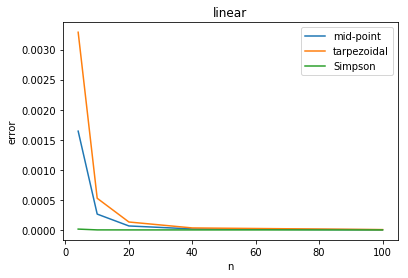

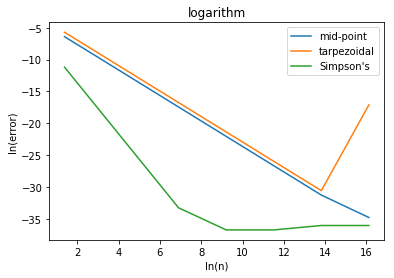

In [24]:
import matplotlib.pyplot as plt
plt.figure()
plt.title("linear")
plt.plot(nList[0:5],np.abs(errorTable)[0:5,0],label="mid-point")
plt.plot(nList[0:5],np.abs(errorTable)[0:5,1],label="tarpezoidal")
plt.plot(nList[0:5],np.abs(errorTable)[0:5,2],label="Simpson")
plt.legend()
plt.xlabel("n")
plt.ylabel("error")

plt.figure()
plt.title("logarithm")
plt.xlabel("ln(n)")
plt.ylabel("ln(error)")
logN=np.log(nList)
logError=np.log(np.abs(errorTable))
plt.plot(logN,logError[:,0],label="mid-point")
plt.plot(logN,logError[:,1],label="tarpezoidal")
plt.plot(logN,logError[:,2],label="Simpson's")
plt.legend()

The error and n has been plotted in the figures above. It's then easy to varify that the mid-point and the tarpezoidal method are, indeed, of the same magnitude of precision, and their error is proportional to $o(\frac{1}{n^2})$; and the error of Simpson's method is proportional to $o(\frac{1}{n^5})$.




**(b)** Find the point where the minimum error can be achieved for the Simpson's method and the mid-point method.





As is shown in the logarithm figure, the error of mid-point method steadily goes down as $n$ increases. The minimum error is achieved approximately at `n=1e7`, and the error is about `7e-16`


In contrast, the error of the Simpson's method is already very small at a relatively small $n$. Therefore, as $n$ goes up, the numerical error `舍入误差` becomes dominant instead, which leads to the rise of errors. The minimum error is `1e-16`, which is achieved at `n=1e4`







**(c)** Use Simpson's rule to estimate the integral of

$$F(x) = (2\pi)^{-1/2}e^{-x^2}$$
for $-1\le x \le 1, -2\le x \le 2$ and $-3 \le x \le 3$.


In [22]:
def F(x):
    return 1/math.sqrt(2*math.pi)*math.exp(-x*x)

print(simpson(F,100,-1,1))
print(simpson(F,100,-2,2))
print(simpson(F,100,-3,3))


0.5958794462495701
0.703799114746634
0.7070911595817403


as the integral range gets larger, the result should approach $\frac{1}{\sqrt{2}}$

